# Hierarchical Clustering.

### Comparision of classes in target variable b/w Hierarchical clustering and K-Means clustering and building Classification models to test the accuracy.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('grains.csv')
df.head(5)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


<AxesSubplot:>

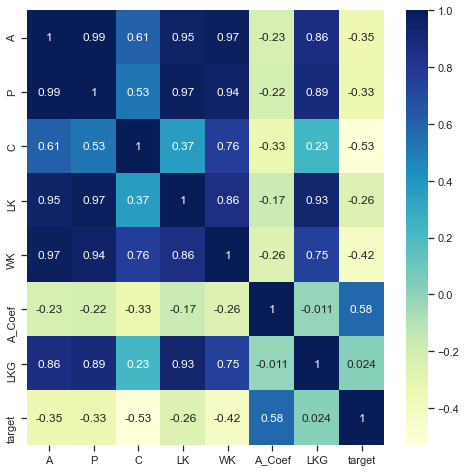

In [6]:
plt.figure(figsize=[8,8])
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [16]:
## orginal data sets target variable's value counts.
df['target'].value_counts()

2    70
1    70
0    70
Name: target, dtype: int64

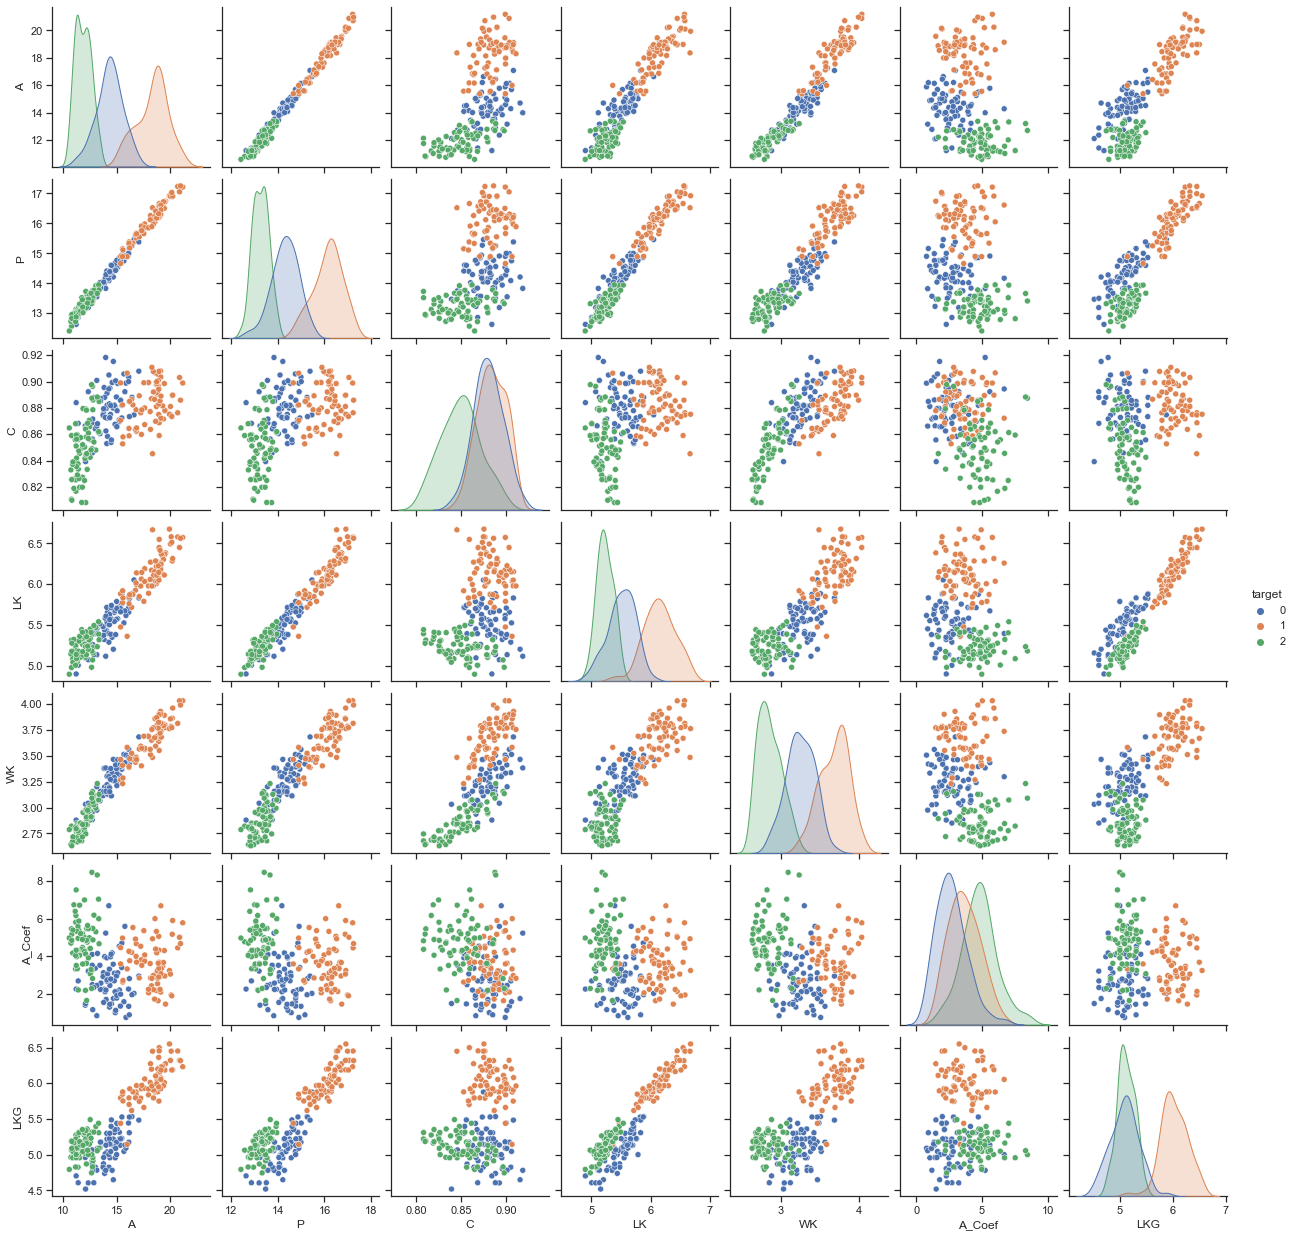

In [23]:
sns.pairplot(df,hue='target',palette='deep')

## We can easily see the three target classes from our pairplot above.

## Creating the dataset.

In [57]:
## Excluding the target feature and create a new dataset:
dff = data.iloc[:,0:7]
dff.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


Now we are going to build our machine learning clustering models. 

we will be using two methods; **k-means clustering** and **hierarchical clustering/Agglomerative clustering** algorithms.

`For k-means clustering algorithm:`
* First of all I will find the best k value.
* Than I will use this k value to create a k-means model.
* And I will compare my original and k-means clustered datas.

`For hierarchical clustering algorithm:`
* First I will apply a dendrogram in order to find how many classes do I have in my data.
* Than I will use this class number to apply a hierarchical clustering algorithm.
* Lastly I will compare my original, k-means and hierarchical clustered datas.


## `K-means Clustering Algorithm:`
- **`Finding the best K value`**.

In [119]:
from sklearn.cluster import KMeans

In [120]:
cluster_range = range(1,15)
cluster_errors = []
    
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(dff)
        
    cluster_errors.append(clusters.inertia_)

In [121]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range,
                           'cluster_errors':cluster_errors})

cluster_df.head()

,num_clusters,cluster_errors
0,1,2719.852410
1,2,1011.712345
2,3,587.318612
3,4,471.498309
4,5,387.473173


## Elbow plot:

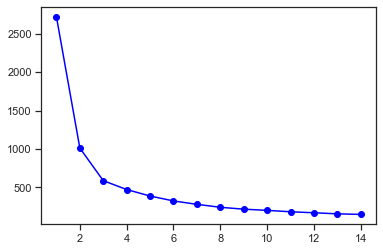

In [122]:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='blue',marker='o')

### We can see that from above plot, its elbow(where it bends) is the best K value, for our K means algorithim it is 3.

## Building the K-Means clustering model with `best K value (i.e 3)`.

In [123]:
kmeans = KMeans(n_clusters=3)

kmeans_model = kmeans.fit(dff)

In [124]:
kmeans_model

KMeans(n_clusters=3)

In [125]:
## creating a dataframe of the labels.
df_lables = pd.DataFrame(kmeans_model.labels_,columns=['Label'])

In [216]:
## creating a copy of the dataset and joining the predicted label dataframe.
df_kmeans = dff.copy()

df_kmeans = df_kmeans.join(df_lables)
df_kmeans.head()

,A,P,C,LK,WK,A_Coef,LKG,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


## Comapring the Original classes and K-means Algorithm classes:
- **for Visualization we only using two features A and P**

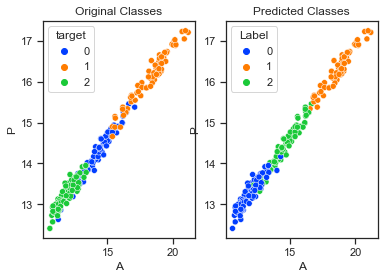

In [138]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='A',y='P', hue='target',data=df,ax=ax1,palette='bright')

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='A',y='P',hue='Label',data=df_kmeans,ax=ax2,palette='bright')
plt.show()

In [139]:
print('Original Data classes:')
print(df['target'].value_counts())
print('~'*30)
print('Predicted Data Classes:')
print(df_kmeans['Label'].value_counts())

Original Data classes:
2    70
1    70
0    70
Name: target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Predicted Data Classes:
0    77
2    72
1    61
Name: Label, dtype: int64


## `Hierarchical Clustering Algorithm:`

- **Creating the Dendogram**.
We use dendrogram to find how many classes we have in our data set.

In [140]:
from scipy.cluster.hierarchy import linkage, dendrogram

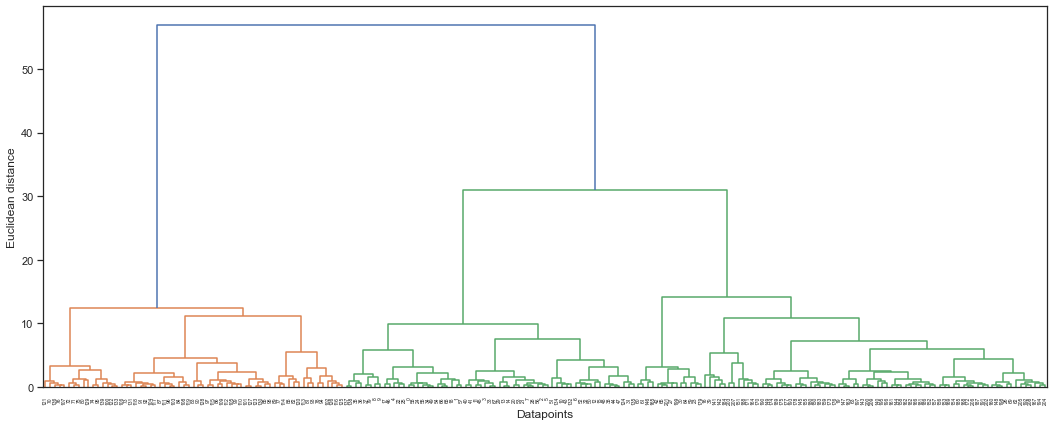

In [130]:
plt.figure(figsize=[18,7])
merg = linkage(dff, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

### From the above dendogram we can see there are 3 classes.

In [131]:
from sklearn.cluster import AgglomerativeClustering

In [132]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')

hie_cluster_model = hie_cluster.fit(dff)

In [133]:
## Creating a dataframe of the labels

df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Label'])
df_label1.head(2)

,Label
0,2
1,2


In [141]:
## creating the copy of the datatset and joing the labels dataframe.

df_hier = dff.copy()

df_hier = df_hier.join(df_label1)
df_hier.head()

,A,P,C,LK,WK,A_Coef,LKG,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


### Comapring the Original, K-Means and Hierarchical Clustered Classes.

- **for visualiztaion we are using only 2 features**.

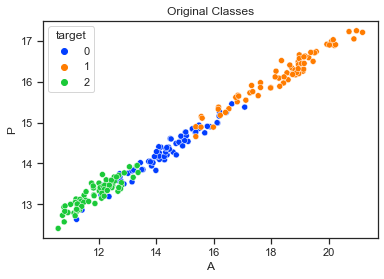

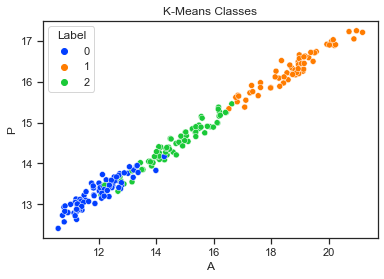

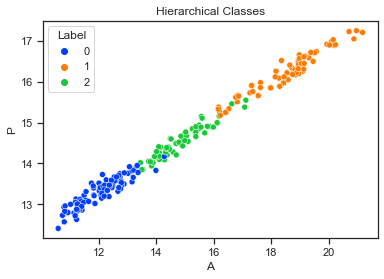

In [142]:
plt.title('Original Classes')
sns.scatterplot(x='A',y='P',hue='target',data=df,palette='bright')
plt.show()

plt.title('K-Means Classes')
sns.scatterplot(x='A',y='P',hue='Label',data=df_kmeans,palette='bright')
plt.show()

plt.title('Hierarchical Classes')
sns.scatterplot(x='A',y='P',hue='Label',data=df_hier,palette='bright')
plt.show()

In [144]:
print('Original Data classes:')
print(df['target'].value_counts())
print('~'*30)
print('K-Means Data Classes:')
print(df_kmeans['Label'].value_counts())
print('~'*30)
print('Hierarchical Data Classes:')
print(df_hier['Label'].value_counts())

Original Data classes:
2    70
1    70
0    70
Name: target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Data Classes:
0    77
2    72
1    61
Name: Label, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Hierarchical Data Classes:
0    86
1    63
2    61
Name: Label, dtype: int64


### We can see our models' differences from the comparision of our algorithms' class counts.

## `Building An Classification models`.

### K-Means.

In [145]:
df_kmeans.head(2)

,A,P,C,LK,WK,A_Coef,LKG,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2


## Splitting the data.

In [156]:
X = df_kmeans.drop('Label',axis=1)
y = df_kmeans['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Scaling the data.

In [157]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)  ## fit and transform.
X_test = pd.DataFrame(X_test, columns=X.columns)    ## only transform.

In [158]:
X_train.head(2)

,A,P,C,LK,WK,A_Coef,LKG
0,2.223340,2.081681,1.162210,2.230406,2.068601,1.394721,1.777279
1,1.896453,1.849064,0.769924,1.631014,1.879625,1.476931,1.685904


In [159]:
X_test.head(2)

,A,P,C,LK,WK,A_Coef,LKG
0,1.444376,1.523401,0.143119,1.933033,1.019915,0.908252,2.055653
1,-0.662999,-0.795011,0.693172,-1.101098,-0.364138,-0.934349,-1.673718


## Decision Tree Classifier.

In [160]:
dtree = DecisionTreeClassifier(max_depth=3)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [161]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

print('Train-Accuracy: ',accuracy_score(y_train, y_train_pred))
print('Test-Accuracy: ',accuracy_score(y_test, y_test_pred))

Train-Accuracy:  0.9795918367346939
Test-Accuracy:  0.9523809523809523


In [162]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.95      0.98        21
           2       1.00      0.90      0.95        20

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest:

In [166]:
Rforest = RandomForestClassifier(n_estimators=11, random_state=0,
                                min_samples_split=5, criterion='gini',
                                max_depth=5)

Rforest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=11,
                       random_state=0)

In [167]:
y_train_pred = Rforest.predict(X_train)
y_test_pred = Rforest.predict(X_test)

print('Train-Accuracy: ',accuracy_score(y_train, y_train_pred))
print('Test-Accuracy: ',accuracy_score(y_test, y_test_pred))

Train-Accuracy:  1.0
Test-Accuracy:  0.9841269841269841


In [168]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



## KNN:

In [171]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors=8, weights='uniform',
                           metric='euclidean',)

Knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [172]:
y_train_pred = Knn.predict(X_train)
y_test_pred = Knn.predict(X_test)

print('Train-Accuracy: ',accuracy_score(y_train, y_train_pred))
print('Test-Accuracy: ',accuracy_score(y_test, y_test_pred))

Train-Accuracy:  0.9727891156462585
Test-Accuracy:  0.9523809523809523


## Agglomerative Clustering.

In [200]:
df_hier.head()

,A,P,C,LK,WK,A_Coef,LKG,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


## Splitting the data.

In [201]:
X = df_hier.drop('Label',axis=1)
y = df_hier['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Scaling the data.

In [202]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)  ## fit and transform.
X_test = pd.DataFrame(X_test, columns=X.columns)    ## only transform.

## Decision Tree Classifier.

In [203]:
dtree = DecisionTreeClassifier(max_depth=3)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [204]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

print('Train-Accuracy: ',accuracy_score(y_train, y_train_pred))
print('Test-Accuracy: ',accuracy_score(y_test, y_test_pred))

Train-Accuracy:  0.9727891156462585
Test-Accuracy:  0.9523809523809523


In [205]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.86      0.93        22
           2       0.89      1.00      0.94        17

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest.

In [206]:
Rforest = RandomForestClassifier(n_estimators=100, random_state=0,
                                min_samples_split=5, criterion='gini',
                                max_depth=5)

Rforest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=0)

In [207]:
y_train_pred = Rforest.predict(X_train)
y_test_pred = Rforest.predict(X_test)

print('Train-Accuracy: ',accuracy_score(y_train, y_train_pred))
print('Test-Accuracy: ',accuracy_score(y_test, y_test_pred))

Train-Accuracy:  0.9931972789115646
Test-Accuracy:  0.9682539682539683


In [208]:
Rforest = RandomForestClassifier(n_estimators=11, random_state=0,
                                min_samples_split=5, criterion='gini',
                                max_depth=5)

Rforest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=11,
                       random_state=0)

In [209]:
y_train_pred = Rforest.predict(X_train)
y_test_pred = Rforest.predict(X_test)

print('Train-Accuracy: ',accuracy_score(y_train, y_train_pred))
print('Test-Accuracy: ',accuracy_score(y_test, y_test_pred))

Train-Accuracy:  0.9795918367346939
Test-Accuracy:  1.0


In [210]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



## KNN.

In [211]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors=8, weights='uniform',
                           metric='euclidean',)

Knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [212]:
y_train_pred = Knn.predict(X_train)
y_test_pred = Knn.predict(X_test)

print('Train-Accuracy: ',accuracy_score(y_train, y_train_pred))
print('Test-Accuracy: ',accuracy_score(y_test, y_test_pred))

Train-Accuracy:  0.9591836734693877
Test-Accuracy:  1.0
